In [851]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [852]:
print("The current working directory is: ",
       os.getcwd()
     )


The current working directory is:  c:\Users\30697\Desktop\Jobs\Job Descriptions\ML_assignment_2025


In [853]:
energy = pd.read_excel("energy_data.xlsx")

### Prepare CO2 factor Vector Y 1x168 to forecast

In [854]:
# Create a dict of all lagged columns
future_targets = {
    f'CO2factor_t+{i}': energy['CO2factor'].shift(-i)
    for i in range(1, 168)
}

# Concatenate the lagged columns into a dataframe
lagged_df = pd.concat(future_targets.values(), axis=1)

lagged_df.columns = future_targets.keys() # columns names

print(lagged_df.head())

   CO2factor_t+1  CO2factor_t+2  CO2factor_t+3  CO2factor_t+4  CO2factor_t+5  \
0       0.358140       0.349210       0.339635       0.330915       0.332042   
1       0.349210       0.339635       0.330915       0.332042       0.330217   
2       0.339635       0.330915       0.332042       0.330217       0.334135   
3       0.330915       0.332042       0.330217       0.334135       0.342233   
4       0.332042       0.330217       0.334135       0.342233       0.344718   

   CO2factor_t+6  CO2factor_t+7  CO2factor_t+8  CO2factor_t+9  CO2factor_t+10  \
0       0.330217       0.334135       0.342233       0.344718        0.337523   
1       0.334135       0.342233       0.344718       0.337523        0.321490   
2       0.342233       0.344718       0.337523       0.321490        0.308863   
3       0.344718       0.337523       0.321490       0.308863        0.308198   
4       0.337523       0.321490       0.308863       0.308198        0.322652   

   ...  CO2factor_t+158  CO2fact

In [855]:
# merge with main dataset
energy = pd.concat([energy, lagged_df], axis=1)

energy.head()  

,starting_time,CO2factor,solar,landwind,seawind,biomass,CO2factor_t+1,CO2factor_t+2,CO2factor_t+3,CO2factor_t+4,...,CO2factor_t+158,CO2factor_t+159,CO2factor_t+160,CO2factor_t+161,CO2factor_t+162,CO2factor_t+163,CO2factor_t+164,CO2factor_t+165,CO2factor_t+166,CO2factor_t+167
0,2020-12-31 23:00:00,0.361425,0,82894,256749,662593,0.358140,0.349210,0.339635,0.330915,...,0.326481,0.332229,0.337505,0.338211,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443
1,2021-01-01 00:00:00,0.358140,0,95906,325500,675321,0.349210,0.339635,0.330915,0.332042,...,0.332229,0.337505,0.338211,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443,0.354466
2,2021-01-01 01:00:00,0.349210,0,122117,332500,588699,0.339635,0.330915,0.332042,0.330217,...,0.337505,0.338211,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443,0.354466,0.353488
3,2021-01-01 02:00:00,0.339635,0,87353,322749,487599,0.330915,0.332042,0.330217,0.334135,...,0.338211,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443,0.354466,0.353488,0.354207
4,2021-01-01 03:00:00,0.330915,0,59687,351750,392943,0.332042,0.330217,0.334135,0.342233,...,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443,0.354466,0.353488,0.354207,0.358786


In [856]:
energy.tail()

,starting_time,CO2factor,solar,landwind,seawind,biomass,CO2factor_t+1,CO2factor_t+2,CO2factor_t+3,CO2factor_t+4,...,CO2factor_t+158,CO2factor_t+159,CO2factor_t+160,CO2factor_t+161,CO2factor_t+162,CO2factor_t+163,CO2factor_t+164,CO2factor_t+165,CO2factor_t+166,CO2factor_t+167
35059,2024-12-31 18:00:00,0.094857,0,6375458,3711000,70087,0.086264,0.083229,0.081749,0.077602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35060,2024-12-31 19:00:00,0.086264,0,6448966,3718000,70205,0.083229,0.081749,0.077602,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35061,2024-12-31 20:00:00,0.083229,0,6472458,3744500,70264,0.081749,0.077602,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35062,2024-12-31 21:00:00,0.081749,0,6486790,3686750,70263,0.077602,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35063,2024-12-31 22:00:00,0.077602,0,6499171,3719250,70146,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [857]:
# we need to drop the last 167 rows due to NaN values in the lagged columns
energy = energy.dropna()  # drop rows with NaN values

In [858]:
energy.shape # check again shape of dataset

(34897, 173)

# Linear Regression Models

### Simple Linear Regression Model: $Y_t = \beta X_t+\epsilon_t$  

### where $Y_t$ is a matrix of CO2 factors at  hour t to hour $t+167$, $\beta$ is a vector of 168 different regression coefficients, $X_t$ is solar energy volume in KWh at hour $t$ , and $\epsilon_t$ is the error term at hour $t$

In [859]:
# import sklearn modules to run linear regression

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [860]:
# Features: Solar energy at time t
X = energy[['solar']].values

# Response: CO₂ factor from t to t+167
Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]].values

In [861]:
# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response

In [862]:
# pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])

In [863]:
# fit the model


pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 MultiOutputRegressor(estimator=LinearRegression()))])

In [864]:
# predict
Y_pred = pipeline.predict(X_test)

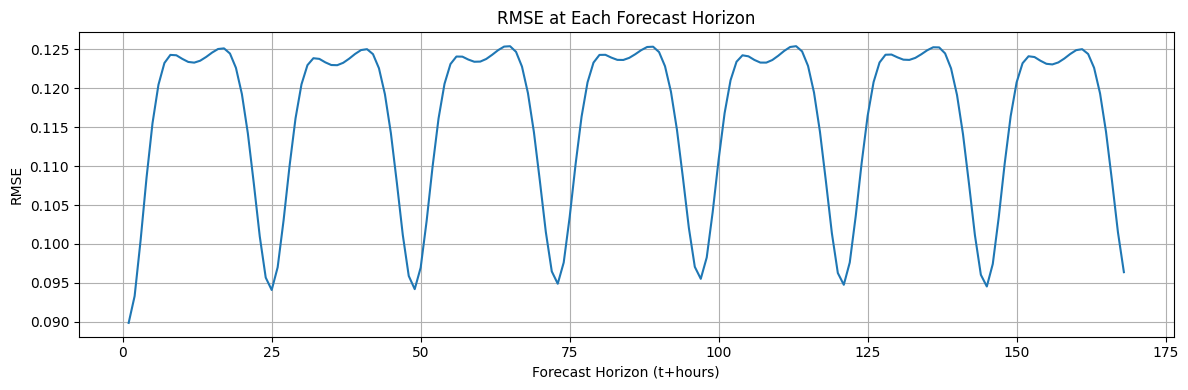

In [865]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()


In [866]:
# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")


Average RMSE over 168 forecast steps: 0.1163


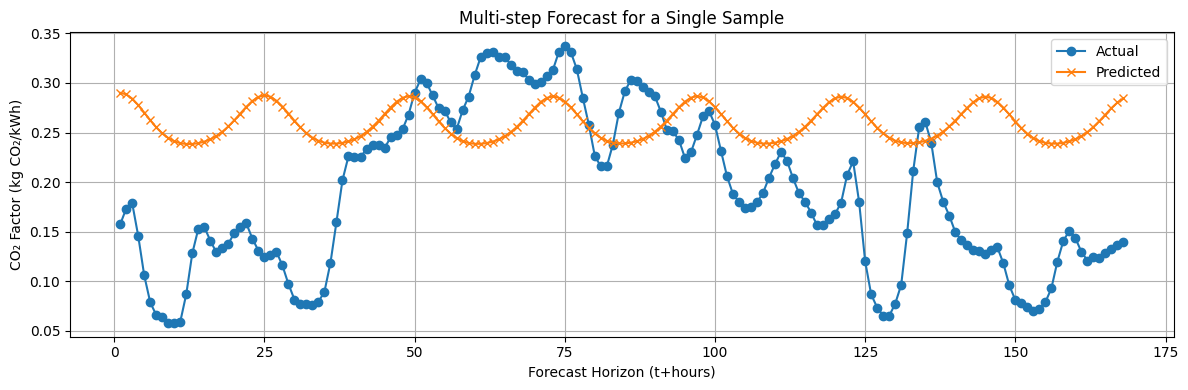

In [867]:
idx = 0  # First test sample
plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), Y_test[idx], label='Actual', marker='o')
plt.plot(range(1, 169), Y_pred[idx], label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Multiple Linear Regression model: $Y_t = \beta X_t+\epsilon_t$  

### where $Y_t$ is a matrix of CO2 factors at  hour t to hour $t+167$, $\beta$ is a vector of 168 different regression coefficients, $X_t$ contains the features energy volume in KWh at hour $t$ , and $\epsilon_t$ is the error term at hour $t$

In [868]:
X = energy[["solar", 
            "landwind", 
            "seawind", 
            "biomass"]]

Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]
# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response


# pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])

pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [869]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

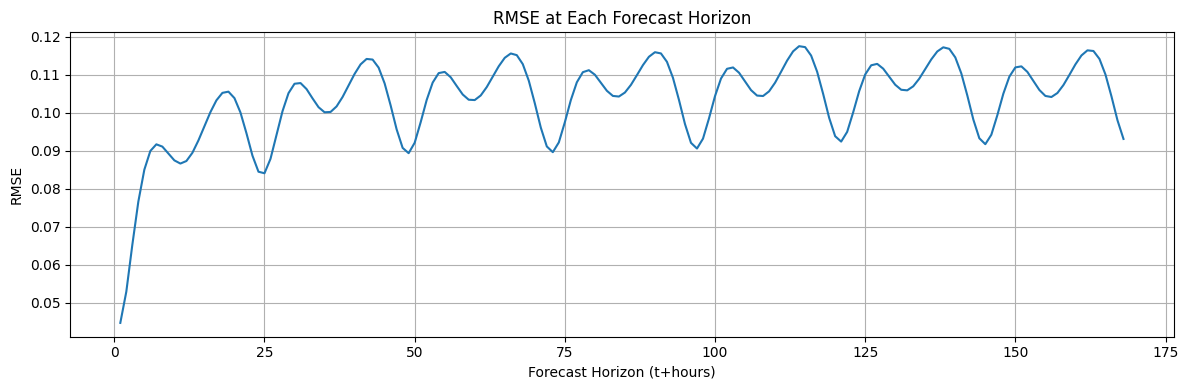

In [870]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()


In [871]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.1034
Average MAE over 168 forecast steps: 0.0884
Average R² over 168 forecast steps: 0.1148


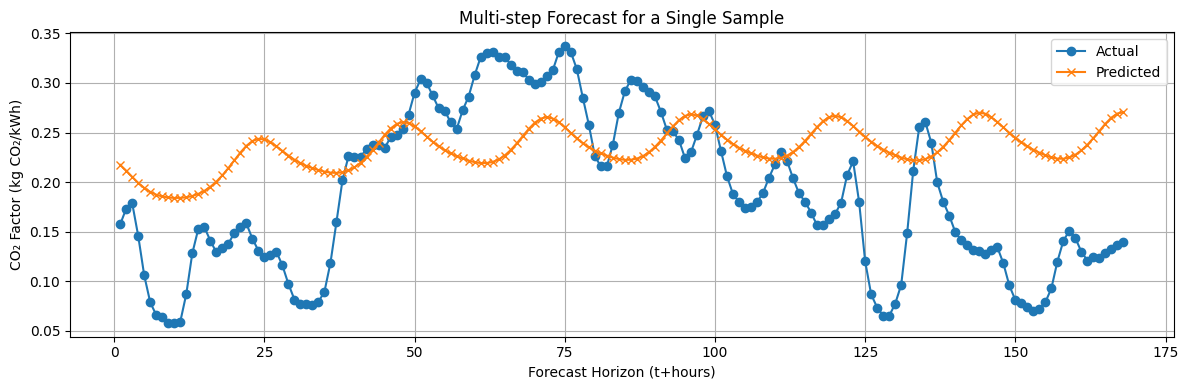

In [872]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Create Indicators to control for time dependencies and seasonalities of the data

In [873]:
energy['hour'] = energy['starting_time'].dt.hour # extract hours from starting_time

hour_dummies = pd.get_dummies(energy['hour'], prefix='hour', drop_first=False).astype(int) # create indicator variables for hours


energy = pd.concat([energy, hour_dummies], axis=1) # merge with original dataset

## Multiple Linear Regression with hour indicators

In [874]:

base_features = ["solar", "landwind", "seawind", "biomass"] # main 4 features


hour_features = [col for col in energy.columns if col.startswith('hour_') and col != 'hour_0'] # indicators for each hour of the day, avoid dummy trap


all_features = base_features + hour_features # merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]
# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep hour indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', hour_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [875]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

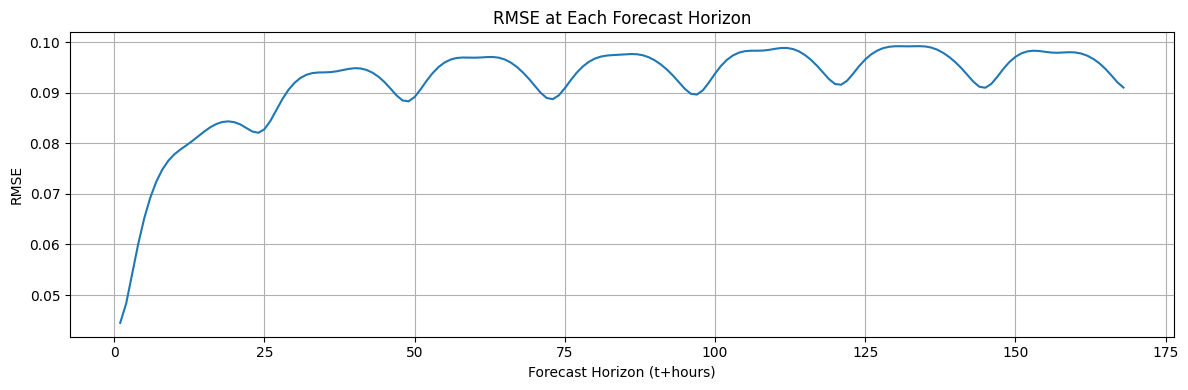

In [876]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [877]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0920
Average MAE over 168 forecast steps: 0.0779
Average R² over 168 forecast steps: 0.2993


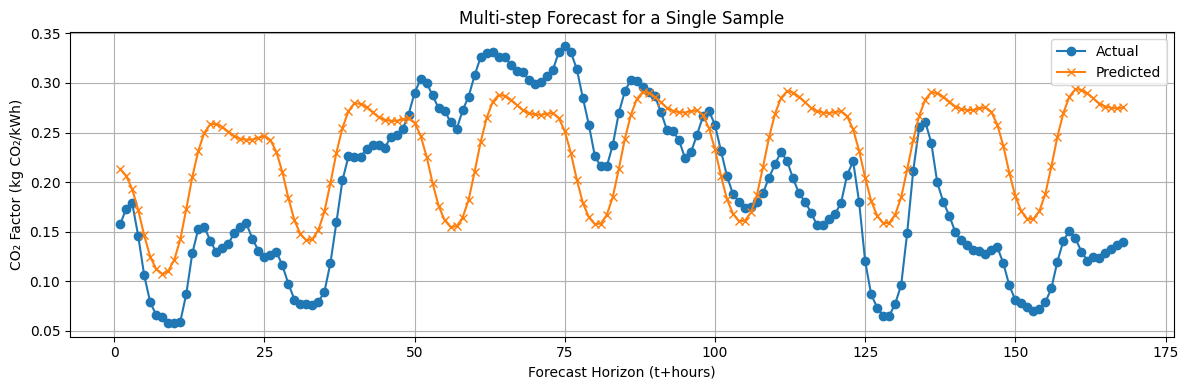

In [878]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Introduce  Season Indicators to the model

In [879]:
# Extract month
energy['month'] = energy['starting_time'].dt.month

# Map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

energy['season'] = energy['month'].apply(get_season) # apply the function to the month column to get season column


season_dummies = pd.get_dummies(energy['season'], prefix='season', drop_first=False).astype(int) # create season indicators

# Add to main DataFrame
energy = pd.concat([energy, season_dummies], axis=1)

In [880]:
base_features = ["solar", "landwind", "seawind", "biomass"] # main 4 features


hour_features = [col for col in energy.columns if col.startswith('hour_') and col != 'hour_0'] # indicators for each hour of the day, avoid dummy trap

season_features = [col for col in energy.columns if col.startswith('season_') and col != 'season_Winter'] # 4 indicators for each season, avoid dummy trap


indicator_features = hour_features + season_features # all indicators

all_features = base_features + hour_features + season_features# merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]
# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep hour indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', indicator_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [881]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

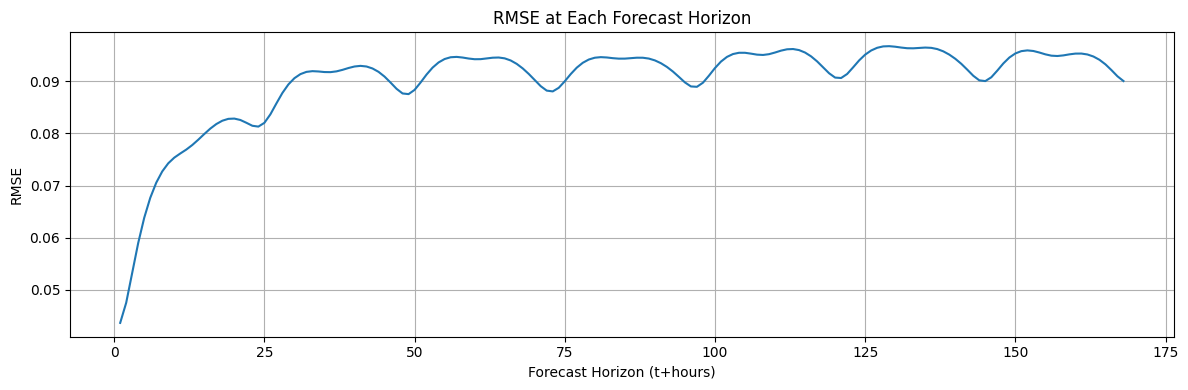

In [882]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [883]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0902
Average MAE over 168 forecast steps: 0.0757
Average R² over 168 forecast steps: 0.3272


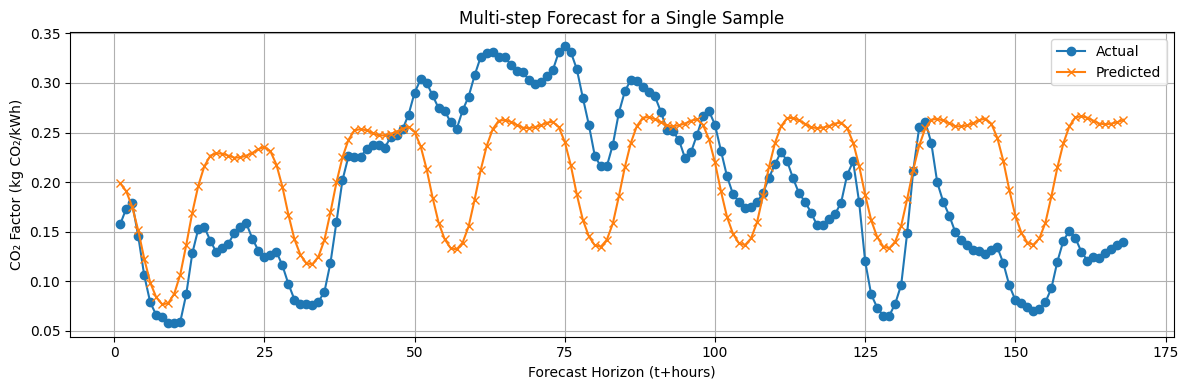

In [884]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Introduce Days Indicator to the model

In [885]:
energy.head()

,starting_time,CO2factor,solar,landwind,seawind,biomass,CO2factor_t+1,CO2factor_t+2,CO2factor_t+3,CO2factor_t+4,...,hour_20,hour_21,hour_22,hour_23,month,season,season_Fall,season_Spring,season_Summer,season_Winter
0,2020-12-31 23:00:00,0.361425,0,82894,256749,662593,0.358140,0.349210,0.339635,0.330915,...,0,0,0,1,12,Winter,0,0,0,1
1,2021-01-01 00:00:00,0.358140,0,95906,325500,675321,0.349210,0.339635,0.330915,0.332042,...,0,0,0,0,1,Winter,0,0,0,1
2,2021-01-01 01:00:00,0.349210,0,122117,332500,588699,0.339635,0.330915,0.332042,0.330217,...,0,0,0,0,1,Winter,0,0,0,1
3,2021-01-01 02:00:00,0.339635,0,87353,322749,487599,0.330915,0.332042,0.330217,0.334135,...,0,0,0,0,1,Winter,0,0,0,1
4,2021-01-01 03:00:00,0.330915,0,59687,351750,392943,0.332042,0.330217,0.334135,0.342233,...,0,0,0,0,1,Winter,0,0,0,1


In [886]:
energy['dayofweek'] = energy['starting_time'].dt.dayofweek

day_dummies = pd.get_dummies(energy['dayofweek'], prefix='day', drop_first=True) # get indicators for each day of the week besides 1 for dummy trap (Monday is dropped)
 
day_dummies = day_dummies.astype(int) # change booleans to binary

energy = pd.concat([energy, day_dummies], axis=1) # add to main dataframe

In [887]:

base_features = ["solar", "landwind", "seawind", "biomass"] # main 4 features



hour_features = [col for col in energy.columns if col.startswith('hour_') and col != 'hour_0'] # indicators for each hour of the day, avoid dummy trap

season_features = [col for col in energy.columns if col.startswith('season_') and col != 'season_Winter'] # indicators for each season, avoid dummy trap

day_features = list(day_dummies.columns)  # indicators for each day of the week, avoid dummy trap

indicator_features = hour_features + season_features + day_features # all indicators

all_features = base_features + indicator_features # merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep hour indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', indicator_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [888]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

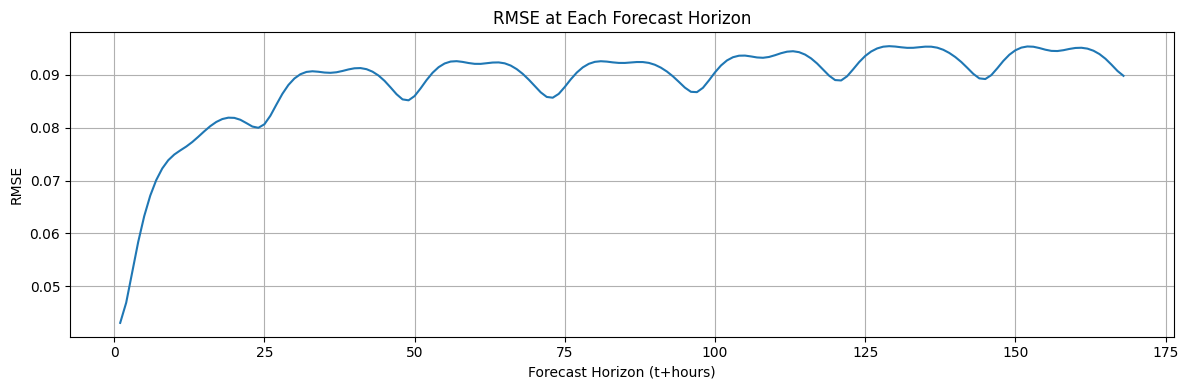

In [889]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [890]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0887
Average MAE over 168 forecast steps: 0.0742
Average R² over 168 forecast steps: 0.3495


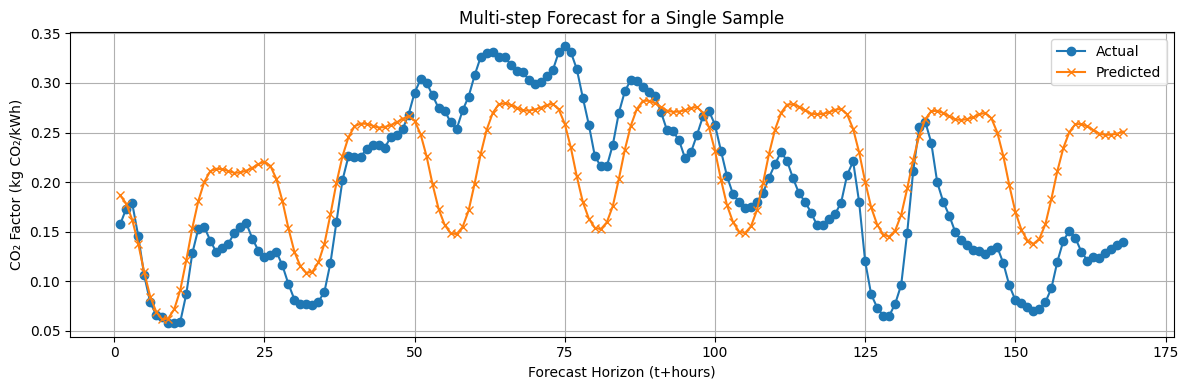

In [840]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## See how the model generalizes over time using time series CV

In [842]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score



X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]
# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response

# scale the main 4 features and keep hour indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', indicator_features)
      ]  
)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])


# cross validation for time series data
tscv = TimeSeriesSplit(n_splits=5)

# manual CV for multiple output regression

scores = []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    Y_tr, Y_te = Y.iloc[train_idx], Y.iloc[test_idx]
    
    pipeline.fit(X_tr, Y_tr)
    Y_pred = pipeline.predict(X_te)

    rmse = np.sqrt(((Y_pred - Y_te.values) ** 2).mean())
    scores.append(rmse)

    print(f"Fold {fold} RMSE: {rmse:.4f}")

# print RMSE for each fold
print(f"\nAverage RMSE across all folds: {np.mean(scores):.4f}")


Fold 1 RMSE: 0.0710
Fold 2 RMSE: 0.0767
Fold 3 RMSE: 0.0859
Fold 4 RMSE: 0.1028
Fold 5 RMSE: 0.0895

Average RMSE across all folds: 0.0852


## Sin/ Cosin Hours instead of Hours Indicators


In [843]:
energy['hour'] = energy['starting_time'].dt.hour
energy['hour_sin'] = np.sin(2 * np.pi * energy['hour'] / 24)
energy['hour_cos'] = np.cos(2 * np.pi * energy['hour'] / 24)


In [844]:
base_features = ["solar", "landwind", "seawind", "biomass", "hour_sin", "hour_cos"] # main 4 features




season_features = [col for col in energy.columns if col.startswith('season_') and col != 'season_Winter'] # indicators for each season, avoid dummy trap

day_features = list(day_dummies.columns)  # indicators for each day of the week, avoid dummy trap

indicator_features = season_features + day_features # all indicators

all_features = base_features + indicator_features # merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep hour indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', indicator_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [845]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

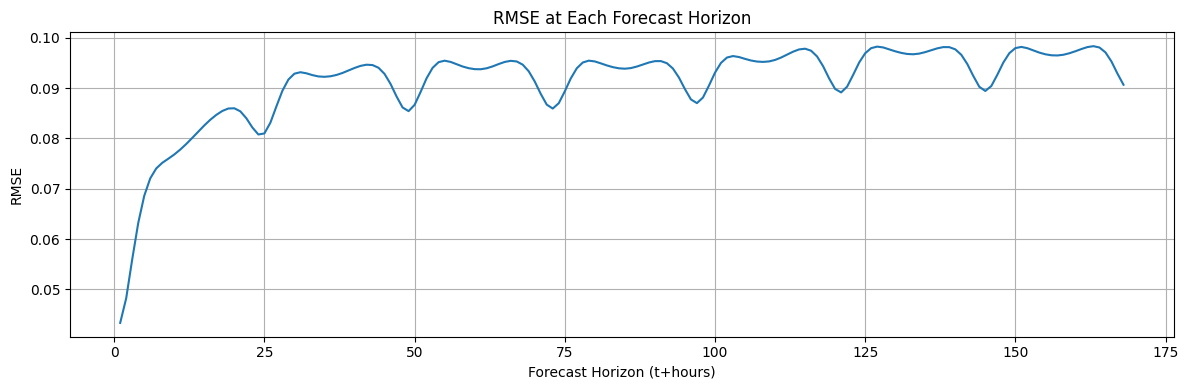

In [846]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [847]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0913
Average MAE over 168 forecast steps: 0.0767
Average R² over 168 forecast steps: 0.3113


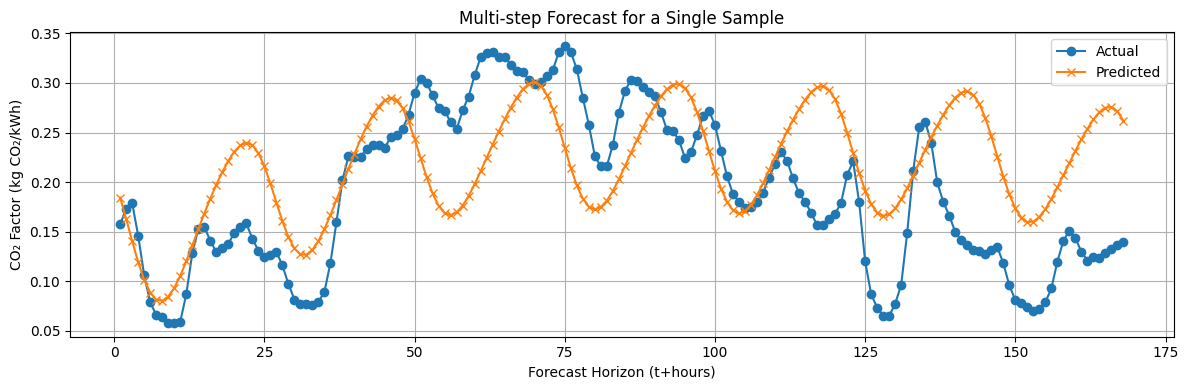

In [848]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [850]:
energy.head(
    
)

,starting_time,CO2factor,solar,landwind,seawind,biomass,CO2factor_t+1,CO2factor_t+2,CO2factor_t+3,CO2factor_t+4,...,season_Winter,dayofweek,day_1,day_2,day_3,day_4,day_5,day_6,hour_sin,hour_cos
0,2020-12-31 23:00:00,0.361425,0,82894,256749,662593,0.358140,0.349210,0.339635,0.330915,...,1,3,0,0,1,0,0,0,-0.258819,0.965926
1,2021-01-01 00:00:00,0.358140,0,95906,325500,675321,0.349210,0.339635,0.330915,0.332042,...,1,4,0,0,0,1,0,0,0.000000,1.000000
2,2021-01-01 01:00:00,0.349210,0,122117,332500,588699,0.339635,0.330915,0.332042,0.330217,...,1,4,0,0,0,1,0,0,0.258819,0.965926
3,2021-01-01 02:00:00,0.339635,0,87353,322749,487599,0.330915,0.332042,0.330217,0.334135,...,1,4,0,0,0,1,0,0,0.500000,0.866025
4,2021-01-01 03:00:00,0.330915,0,59687,351750,392943,0.332042,0.330217,0.334135,0.342233,...,1,4,0,0,0,1,0,0,0.707107,0.707107
